In [1]:
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa,librosa.display

In [2]:
cd F:\BTP

F:\BTP


We removed silences from the audio files with an application.

"bef_rem" is the original dataset of audiofiles.

"aft_rem" is the dataset of audio files after the silence is removed.


In [3]:
import os
bef_rem=os.listdir('DataSets/wav')
aft_rem=os.listdir('remov/wav')

Let's see if the silence is removed from the audio files

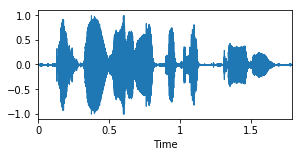

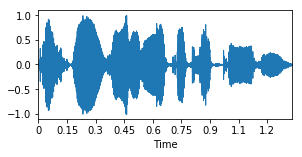

In [4]:
audio_path_bef = 'Datasets/wav/08a02Na.wav'
x , sr = librosa.load(audio_path_bef)
#plt.axis([0, 3, -1, 1])
plt.figure(figsize=(10,2))

plt.subplot(121)
librosa.display.waveplot(x, sr=sr)

audio_path_aft= 'remov/wav/08a02Na.wav'
x , sr = librosa.load(audio_path_aft)
#plt.axis([0, 3, -1, 1])
plt.figure(figsize=(10,2))

plt.subplot(122)
librosa.display.waveplot(x, sr=sr)

We can see clearly form the above plots that the silence is removed within the audiofile.

Let's extract mfcc values from each audio file and its emotion and store them.

_x stores mfccs and _y stores emotions from each audio files in before and after 

In [5]:
mfcc_size = 120
bef_x = np.zeros((len(bef_rem),mfcc_size))
bef_y = np.zeros((len(bef_rem),7),dtype = int)
#bef_x stores the audio files' mfcc
#bef_y stores emotions

code = {
    'W':0, #anger
    'L':1, #boredom
    'E':2, #disgust
    'A':3, #fear
    'F':4, #happy
    'T':5, #sad
    'N':6  #neutral
}
for i in range(len(bef_rem)):
    X, sample_rate = librosa.load('DataSets/wav/'+bef_rem[i], res_type='kaiser_fast')
    bef_y[i][code[bef_rem[i][5]]] = 1  
    bef_x[i] = np.resize(np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=mfcc_size).T,axis=0),(1,mfcc_size))

aft_x = np.zeros((len(aft_rem),mfcc_size))
aft_y = np.zeros((len(aft_rem),7),dtype = int)

#aft_x stores the mfcc after the removal of silences
#aft_y stores emotions

for i in range(len(aft_rem)):
    X, sample_rate = librosa.load('remov/wav/'+aft_rem[i], res_type='kaiser_fast')
    aft_y[i][code[aft_rem[i][5]]] = 1
    aft_x[i] = np.resize(np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=mfcc_size).T,axis=0),(1,mfcc_size))

Now, categorize the datasets of respective emotions

In [6]:
angry_indices = list(np.where(bef_y[:,0]==1)[0])
bef_angry_x = np.zeros((len(angry_indices),mfcc_size))
bef_angry_y = np.zeros((len(angry_indices),7),dtype=int)
aft_angry_x = np.zeros((len(angry_indices),mfcc_size))
aft_angry_y = np.zeros((len(angry_indices),7),dtype=int)
for i in range(len(angry_indices)):
    bef_angry_x[i] = np.resize(bef_x[angry_indices[i]],(1,mfcc_size))
    bef_angry_y[i] = np.resize(bef_y[angry_indices[i]],(1,7))
    aft_angry_x[i] = np.resize(aft_x[angry_indices[i]],(1,mfcc_size))
    aft_angry_y[i] = np.resize(aft_y[angry_indices[i]],(1,7))

boredom_indices = list(np.where(bef_y[:,1]==1)[0])
bef_boredom_x = np.zeros((len(boredom_indices),mfcc_size))
bef_boredom_y = np.zeros((len(boredom_indices),7),dtype=int)
aft_boredom_x = np.zeros((len(boredom_indices),mfcc_size))
aft_boredom_y = np.zeros((len(boredom_indices),7),dtype=int)
for i in range(len(boredom_indices)):
    bef_boredom_x[i] = np.resize(bef_x[boredom_indices[i]],(1,mfcc_size))
    bef_boredom_y[i] = np.resize(bef_y[boredom_indices[i]],(1,7))
    aft_boredom_x[i] = np.resize(aft_x[boredom_indices[i]],(1,mfcc_size))
    aft_boredom_y[i] = np.resize(aft_y[boredom_indices[i]],(1,7))

disgust_indices = list(np.where(bef_y[:,2]==1)[0])
bef_disgust_x = np.zeros((len(disgust_indices),mfcc_size))
bef_disgust_y = np.zeros((len(disgust_indices),7),dtype=int)
aft_disgust_x = np.zeros((len(disgust_indices),mfcc_size))
aft_disgust_y = np.zeros((len(disgust_indices),7),dtype=int)
for i in range(len(disgust_indices)):
    bef_disgust_x[i] = np.resize(bef_x[disgust_indices[i]],(1,mfcc_size))
    bef_disgust_y[i] = np.resize(bef_y[disgust_indices[i]],(1,7))
    aft_disgust_x[i] = np.resize(aft_x[disgust_indices[i]],(1,mfcc_size))
    aft_disgust_y[i] = np.resize(aft_y[disgust_indices[i]],(1,7))

fear_indices = list(np.where(bef_y[:,3]==1)[0])
bef_fear_x = np.zeros((len(fear_indices),mfcc_size))
bef_fear_y = np.zeros((len(fear_indices),7),dtype=int)
aft_fear_x = np.zeros((len(fear_indices),mfcc_size))
aft_fear_y = np.zeros((len(fear_indices),7),dtype=int)
for i in range(len(fear_indices)):
    bef_fear_x[i] = np.resize(bef_x[fear_indices[i]],(1,mfcc_size))
    bef_fear_y[i] = np.resize(bef_y[fear_indices[i]],(1,7))
    aft_fear_x[i] = np.resize(aft_x[fear_indices[i]],(1,mfcc_size))
    aft_fear_y[i] = np.resize(aft_y[fear_indices[i]],(1,7))

happy_indices = list(np.where(bef_y[:,4]==1)[0])
bef_happy_x = np.zeros((len(happy_indices),mfcc_size))
bef_happy_y = np.zeros((len(happy_indices),7),dtype=int)
aft_happy_x = np.zeros((len(happy_indices),mfcc_size))
aft_happy_y = np.zeros((len(happy_indices),7),dtype=int)
for i in range(len(happy_indices)):
    bef_happy_x[i] = np.resize(bef_x[happy_indices[i]],(1,mfcc_size))
    bef_happy_y[i] = np.resize(bef_y[happy_indices[i]],(1,7))
    aft_happy_x[i] = np.resize(aft_x[happy_indices[i]],(1,mfcc_size))
    aft_happy_y[i] = np.resize(aft_y[happy_indices[i]],(1,7))

sad_indices = list(np.where(bef_y[:,5]==1)[0])
bef_sad_x = np.zeros((len(sad_indices),mfcc_size))
bef_sad_y = np.zeros((len(sad_indices),7),dtype=int)
aft_sad_x = np.zeros((len(sad_indices),mfcc_size))
aft_sad_y = np.zeros((len(sad_indices),7),dtype=int)
for i in range(len(sad_indices)):
    bef_sad_x[i] = np.resize(bef_x[sad_indices[i]],(1,mfcc_size))
    bef_sad_y[i] = np.resize(bef_y[sad_indices[i]],(1,7))
    aft_sad_x[i] = np.resize(aft_x[sad_indices[i]],(1,mfcc_size))
    aft_sad_y[i] = np.resize(aft_y[sad_indices[i]],(1,7))

neutral_indices = list(np.where(bef_y[:,6]==1)[0])
bef_neutral_x = np.zeros((len(neutral_indices),mfcc_size))
bef_neutral_y = np.zeros((len(neutral_indices),7),dtype=int)
aft_neutral_x = np.zeros((len(neutral_indices),mfcc_size))
aft_neutral_y = np.zeros((len(neutral_indices),7),dtype=int)
for i in range(len(neutral_indices)):
    bef_neutral_x[i] = np.resize(bef_x[neutral_indices[i]],(1,mfcc_size))
    bef_neutral_y[i] = np.resize(bef_y[neutral_indices[i]],(1,7))
    aft_neutral_x[i] = np.resize(aft_x[neutral_indices[i]],(1,mfcc_size))
    aft_neutral_y[i] = np.resize(aft_y[neutral_indices[i]],(1,7))


Lets divide the dataset into test/train/split as 60/20/20 and create a 3 layered dnn model with 128-256-128 nodes.

model_a is for the dataset after the removal of silence.

model_b is for the dataset before the removal of silemce(original audio).

In [7]:
from sklearn.model_selection import train_test_split
Xa_train1, Xa_test, ya_train1, ya_test = train_test_split(aft_x, aft_y, test_size=0.2, random_state=42)
Xa_train, Xa_valid, ya_train, ya_valid = train_test_split(Xa_train1, ya_train1, test_size=0.25, random_state=42)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

tf.random.set_seed(7)

num_labels = 7
filter_size = 2

model_a = Sequential()

model_a.add(Dense(128, input_shape=(mfcc_size,)))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(256))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(128))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(num_labels))
model_a.add(Activation('softmax'))

model_a.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


model_a.fit(Xa_train, ya_train, batch_size=30, epochs=200, validation_data=(Xa_valid,ya_valid))


Epoch 1/200
11/11 [==============================] - 0s 28ms/step - loss: 29.6865 - accuracy: 0.2038 - val_loss: 7.3341 - val_accuracy: 0.3084
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 20.8009 - accuracy: 0.1379 - val_loss: 3.6301 - val_accuracy: 0.2897
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 12.8200 - accuracy: 0.2194 - val_loss: 1.9587 - val_accuracy: 0.2897
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 9.4192 - accuracy: 0.1755 - val_loss: 1.7339 - val_accuracy: 0.3551
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 6.5578 - accuracy: 0.2476 - val_loss: 1.7015 - val_accuracy: 0.2897
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 5.4542 - accuracy: 0.1850 - val_loss: 1.7754 - val_accuracy: 0.2617
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 4.3192 - accuracy: 0.2539 - val_loss: 1.8028 - val_accuracy: 0.2336
Epoch 8/2

Checking the accuracy of the model_a

In [8]:
from sklearn.metrics import accuracy_score

predict_ya = model_a.predict(Xa_test)
predicted_train_a = model_a.predict(Xa_train)
predicted_test_a = predict_ya
np.where(np.argmax(predict_ya[:]),1,0)
for i in range(len(predict_ya)):
    temp = np.argmax(predict_ya[i])
    predict_ya[i] = np.zeros((1,7))
    predict_ya[i][temp] = 1
aft_acc=accuracy_score(ya_test,predict_ya)
print("Accuracy of the dnn model after removing the silences: ",aft_acc)

Accuracy of the dnn model after removing the silences:  0.6542056074766355


Same with model_b with the Dataset before silence removal

In [9]:
Xb_train1, Xb_test, yb_train1, yb_test = train_test_split(bef_x, bef_y, test_size=0.2, random_state=42)

Xb_train, Xb_valid, yb_train, yb_valid = train_test_split(Xb_train1, yb_train1, test_size=0.25, random_state=42)

tf.random.set_seed(7)


num_labels = 7
filter_size = 2

model_b = Sequential()

model_b.add(Dense(128, input_shape=(mfcc_size,)))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(256))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(128))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(num_labels))
model_b.add(Activation('softmax'))

model_b.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model_b.fit(Xb_train, yb_train, batch_size=30, epochs=200, validation_data=(Xb_valid,yb_valid))


Epoch 1/200
11/11 [==============================] - 0s 26ms/step - loss: 32.6042 - accuracy: 0.1787 - val_loss: 7.3723 - val_accuracy: 0.2336
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 23.0618 - accuracy: 0.1317 - val_loss: 4.1173 - val_accuracy: 0.2804
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 15.4172 - accuracy: 0.1693 - val_loss: 2.3863 - val_accuracy: 0.2710
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 11.4675 - accuracy: 0.1787 - val_loss: 1.8390 - val_accuracy: 0.2710
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 8.2800 - accuracy: 0.1850 - val_loss: 1.7559 - val_accuracy: 0.2804
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 6.5840 - accuracy: 0.1411 - val_loss: 1.7987 - val_accuracy: 0.3084
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 5.6620 - accuracy: 0.1881 - val_loss: 1.7951 - val_accuracy: 0.2430
Epoch 8/

In [10]:
predict_yb= model_b.predict(Xb_test)
predicted_train_b = model_b.predict(Xb_train)
predicted_test_b = predict_yb
np.where(np.argmax(predict_yb[:]),1,0)
for i in range(len(predict_yb)):
    temp = np.argmax(predict_yb[i])
    
    predict_yb[i] = np.zeros((1,7))
    predict_yb[i][temp] = 1
bef_acc=accuracy_score(yb_test,predict_yb)
print("Accuracy of the dnn model after removing the silences: ",bef_acc)

Accuracy of the dnn model after removing the silences:  0.6728971962616822


So, here comes the main part . Calculating the accuracies of predicting different emotions before and after silence removal

In [11]:
dnn_accuracies = [[0 for i in range(2)] for j in range(7)] 

predict_angry_b= model_b.predict(bef_angry_x)
np.where(np.argmax(predict_angry_b[:]),1,0)
for i in range(len(predict_angry_b)):
    temp = np.argmax(predict_angry_b[i])
    predict_angry_b[i] = np.zeros((1,7))
    predict_angry_b[i][temp] = 1
dnn_accuracies[0][0]=round((accuracy_score(bef_angry_y,predict_angry_b)),2)

predict_angry_a= model_a.predict(aft_angry_x)
np.where(np.argmax(predict_angry_a[:]),1,0)
for i in range(len(predict_angry_a)):
    temp = np.argmax(predict_angry_a[i])
    predict_angry_a[i] = np.zeros((1,7))
    predict_angry_a[i][temp] = 1
dnn_accuracies[0][1]=round(accuracy_score(aft_angry_y,predict_angry_a),2)

predict_boredom_b= model_b.predict(bef_boredom_x)
np.where(np.argmax(predict_boredom_b[:]),1,0)
for i in range(len(predict_boredom_b)):
    temp = np.argmax(predict_boredom_b[i])
    predict_boredom_b[i] = np.zeros((1,7))
    predict_boredom_b[i][temp] = 1
dnn_accuracies[1][0]=round(accuracy_score(bef_boredom_y,predict_boredom_b),2)

predict_boredom_a= model_a.predict(aft_boredom_x)
np.where(np.argmax(predict_boredom_a[:]),1,0)
for i in range(len(predict_boredom_a)):
    temp = np.argmax(predict_boredom_a[i])
    predict_boredom_a[i] = np.zeros((1,7))
    predict_boredom_a[i][temp] = 1
dnn_accuracies[1][1]=round(accuracy_score(aft_boredom_y,predict_boredom_a),2)

predict_disgust_b= model_b.predict(bef_disgust_x)
np.where(np.argmax(predict_disgust_b[:]),1,0)
for i in range(len(predict_disgust_b)):
    temp = np.argmax(predict_disgust_b[i])
    predict_disgust_b[i] = np.zeros((1,7))
    predict_disgust_b[i][temp] = 1
dnn_accuracies[2][0]=round(accuracy_score(bef_disgust_y,predict_disgust_b),2)

predict_disgust_a= model_a.predict(aft_disgust_x)
np.where(np.argmax(predict_disgust_a[:]),1,0)
for i in range(len(predict_disgust_a)):
    temp = np.argmax(predict_disgust_a[i])
    predict_disgust_a[i] = np.zeros((1,7))
    predict_disgust_a[i][temp] = 1
dnn_accuracies[2][1]=round(accuracy_score(aft_disgust_y,predict_disgust_a),2)

predict_fear_b= model_b.predict(bef_fear_x)
np.where(np.argmax(predict_fear_b[:]),1,0)
for i in range(len(predict_fear_b)):
    temp = np.argmax(predict_fear_b[i])
    predict_fear_b[i] = np.zeros((1,7))
    predict_fear_b[i][temp] = 1
dnn_accuracies[3][0]=round(accuracy_score(bef_fear_y,predict_fear_b),2)

predict_fear_a= model_a.predict(aft_fear_x)
np.where(np.argmax(predict_fear_a[:]),1,0)
for i in range(len(predict_fear_a)):
    temp = np.argmax(predict_fear_a[i])
    predict_fear_a[i] = np.zeros((1,7))
    predict_fear_a[i][temp] = 1
dnn_accuracies[3][1]=round(accuracy_score(aft_fear_y,predict_fear_a),2)

predict_happy_b= model_b.predict(bef_happy_x)
np.where(np.argmax(predict_happy_b[:]),1,0)
for i in range(len(predict_happy_b)):
    temp = np.argmax(predict_happy_b[i])
    predict_happy_b[i] = np.zeros((1,7))
    predict_happy_b[i][temp] = 1
dnn_accuracies[4][0]=round(accuracy_score(bef_happy_y,predict_happy_b),2)

predict_happy_a= model_a.predict(aft_happy_x)
np.where(np.argmax(predict_happy_a[:]),1,0)
for i in range(len(predict_happy_a)):
    temp = np.argmax(predict_happy_a[i])
    predict_happy_a[i] = np.zeros((1,7))
    predict_happy_a[i][temp] = 1
dnn_accuracies[4][1]=round(accuracy_score(aft_happy_y,predict_happy_a),2)

predict_sad_b= model_b.predict(bef_sad_x)
np.where(np.argmax(predict_sad_b[:]),1,0)
for i in range(len(predict_sad_b)):
    temp = np.argmax(predict_sad_b[i])
    predict_sad_b[i] = np.zeros((1,7))
    predict_sad_b[i][temp] = 1
dnn_accuracies[5][0]=round(accuracy_score(bef_sad_y,predict_sad_b),2)

predict_sad_a= model_a.predict(aft_sad_x)
np.where(np.argmax(predict_sad_a[:]),1,0)
for i in range(len(predict_sad_a)):
    temp = np.argmax(predict_sad_a[i])
    predict_sad_a[i] = np.zeros((1,7))
    predict_sad_a[i][temp] = 1
dnn_accuracies[5][1]=round(accuracy_score(aft_sad_y,predict_sad_a),2)

predict_neutral_b= model_b.predict(bef_neutral_x)
np.where(np.argmax(predict_neutral_b[:]),1,0)
for i in range(len(predict_neutral_b)):
    temp = np.argmax(predict_neutral_b[i])
    predict_neutral_b[i] = np.zeros((1,7))
    predict_neutral_b[i][temp] = 1
dnn_accuracies[6][0]=round(accuracy_score(bef_neutral_y,predict_neutral_b),2)

predict_neutral_a= model_a.predict(aft_neutral_x)
np.where(np.argmax(predict_neutral_a[:]),1,0)
for i in range(len(predict_neutral_a)):
    temp = np.argmax(predict_neutral_a[i])
    predict_neutral_a[i] = np.zeros((1,7))
    predict_neutral_a[i][temp] = 1
dnn_accuracies[6][1]=round(accuracy_score(aft_neutral_y,predict_neutral_a),2)


In [12]:
print("The format is emotion[before_removal   after_removal]")
print('\nangry', (dnn_accuracies[0]))
print('\nboredom', dnn_accuracies[1])
print('\ndisgust', dnn_accuracies[2])
print('\nfear', dnn_accuracies[3])
print('\nhappy', dnn_accuracies[4])
print('\nsad', dnn_accuracies[5])
print('\nneutral', dnn_accuracies[6])


The format is emotion[before_removal   after_removal]

angry [0.95, 0.96]

boredom [0.75, 0.77]

disgust [0.87, 0.72]

fear [0.9, 0.8]

happy [0.8, 0.77]

sad [0.98, 0.97]

neutral [0.86, 0.81]


From these results i.e the prediction accuracies of different emotions with the dnn model built,

We can see that the overall accuracy in predicting the emotion is **decreased when we removed the silence** from the audio file.

But on the other hand, the accuracy on predicting the emotions **angry and boredom is less than that of those when removed the silence.**  


However , we cannot conclude on this dnn model solely. We have to compare with svm as also to conclude our results.

Lets create a SVM classifier.

In [13]:
from sklearn import svm

LinearSVC doesn't accept 2-d values for y. So, we're going to convert the onehot encoded data into 7 different outputs 

In [21]:
yb_train_emotions = tf.argmax(yb_train1, axis=1)
yb_test_emotions = tf.argmax(yb_test, axis=1)
ya_train_emotions = tf.argmax(ya_train1, axis=1)
ya_test_emotions = tf.argmax(ya_test, axis=1)
bef_angry_emotions = tf.argmax(bef_angry_y, axis=1)
aft_angry_emotions = tf.argmax(aft_angry_y, axis=1)
bef_boredom_emotions = tf.argmax(bef_boredom_y, axis=1)
aft_boredom_emotions = tf.argmax(aft_boredom_y, axis=1)
bef_disgust_emotions = tf.argmax(bef_disgust_y, axis=1)
aft_disgust_emotions = tf.argmax(aft_disgust_y, axis=1)
bef_fear_emotions = tf.argmax(bef_fear_y, axis=1)
aft_fear_emotions = tf.argmax(aft_fear_y, axis=1)
bef_happy_emotions = tf.argmax(bef_happy_y, axis=1)
aft_happy_emotions = tf.argmax(aft_happy_y, axis=1)
bef_sad_emotions = tf.argmax(bef_sad_y, axis=1)
aft_sad_emotions = tf.argmax(aft_sad_y, axis=1)
bef_neutral_emotions = tf.argmax(bef_neutral_y, axis=1)
aft_neutral_emotions = tf.argmax(aft_neutral_y, axis=1)


#lets see what we did here

print(yb_train1[3:8])
print(yb_train_emotions[3:8])

[[0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]]
tf.Tensor([6 6 5 0 0], shape=(5,), dtype=int64)


clf_b is the classifier for the ones before removal of silence.

clf_a is the classifier after the removal of silence.


In [22]:
clf_b = svm.SVC(kernel='linear')
clf_b.fit(Xb_train1, yb_train_emotions)
yb_pred = clf_b.predict(Xb_test)
print(yb_pred,yb_test_emotions)
print("Accuracy:",metrics.accuracy_score(yb_test_emotions,yb_pred))

[0 0 6 5 5 5 5 5 6 4 0 1 1 2 5 3 0 1 0 1 4 0 0 6 5 3 1 6 0 1 4 6 4 0 5 3 4
 6 3 4 6 0 2 4 6 0 4 4 3 1 0 0 1 0 6 6 4 0 0 0 0 0 0 1 3 1 3 5 0 6 3 6 4 1
 0 1 4 4 1 0 4 3 6 6 6 4 0 1 1 0 5 0 2 2 3 6 6 0 0 6 0 1 6 1 0 0 0] tf.Tensor(
[0 0 6 5 5 5 1 1 6 4 0 1 1 0 5 3 0 1 0 1 4 0 0 6 5 6 1 6 4 1 4 6 4 0 5 3 4
 1 0 3 1 3 4 4 1 4 4 4 3 2 0 0 1 0 6 6 3 4 0 4 3 0 0 1 4 1 3 5 3 6 3 1 4 1
 0 1 4 4 6 0 4 4 6 1 1 4 0 6 6 0 3 0 2 2 4 6 1 0 0 6 0 1 6 6 0 0 0], shape=(107,), dtype=int64)
Accuracy: 0.7102803738317757


In [23]:
clf_a = svm.SVC(kernel='linear')
clf_a.fit(Xa_train1, ya_train_emotions)
ya_pred = clf_a.predict(Xa_test)
print(yb_pred,yb_test_emotions)
print("Accuracy:",accuracy_score(ya_pred,ya_test_emotions))


[0 0 6 5 5 5 5 5 6 4 0 1 1 2 5 3 0 1 0 1 4 0 0 6 5 3 1 6 0 1 4 6 4 0 5 3 4
 6 3 4 6 0 2 4 6 0 4 4 3 1 0 0 1 0 6 6 4 0 0 0 0 0 0 1 3 1 3 5 0 6 3 6 4 1
 0 1 4 4 1 0 4 3 6 6 6 4 0 1 1 0 5 0 2 2 3 6 6 0 0 6 0 1 6 1 0 0 0] tf.Tensor(
[0 0 6 5 5 5 1 1 6 4 0 1 1 0 5 3 0 1 0 1 4 0 0 6 5 6 1 6 4 1 4 6 4 0 5 3 4
 1 0 3 1 3 4 4 1 4 4 4 3 2 0 0 1 0 6 6 3 4 0 4 3 0 0 1 4 1 3 5 3 6 3 1 4 1
 0 1 4 4 6 0 4 4 6 1 1 4 0 6 6 0 3 0 2 2 4 6 1 0 0 6 0 1 6 6 0 0 0], shape=(107,), dtype=int64)
Accuracy: 0.7009345794392523


In [24]:
svm_accuracies = [[0 for i in range(2)] for j in range(7)] 

svm_predict_angry_b= clf_b.predict(bef_angry_x)
svm_accuracies[0][0]=round((accuracy_score(bef_angry_emotions,svm_predict_angry_b)),2)

svm_predict_angry_a= clf_a.predict(aft_angry_x)
svm_accuracies[0][1]=round(accuracy_score(aft_angry_emotions,svm_predict_angry_a),2)

svm_predict_boredom_b= clf_b.predict(bef_boredom_x)
svm_accuracies[1][0]=round(accuracy_score(bef_boredom_emotions,svm_predict_boredom_b),2)

svm_predict_boredom_a= clf_a.predict(aft_boredom_x)
svm_accuracies[1][1]=round(accuracy_score(aft_boredom_emotions,svm_predict_boredom_a),2)

svm_predict_disgust_b= clf_b.predict(bef_disgust_x)
svm_accuracies[2][0]=round(accuracy_score(bef_disgust_emotions,svm_predict_disgust_b),2)

svm_predict_disgust_a= clf_a.predict(aft_disgust_x)
svm_accuracies[2][1]=round(accuracy_score(aft_disgust_emotions,svm_predict_disgust_a),2)

svm_predict_fear_b= clf_b.predict(bef_fear_x)
svm_accuracies[3][0]=round(accuracy_score(bef_fear_emotions,svm_predict_fear_b),2)

svm_predict_fear_a= clf_a.predict(aft_fear_x)
svm_accuracies[3][1]=round(accuracy_score(aft_fear_emotions,svm_predict_fear_a),2)

svm_predict_happy_b= clf_b.predict(bef_happy_x)
svm_accuracies[4][0]=round(accuracy_score(bef_happy_emotions,svm_predict_happy_b),2)

svm_predict_happy_a= clf_a.predict(aft_happy_x)
svm_accuracies[4][1]=round(accuracy_score(aft_happy_emotions,svm_predict_happy_a),2)

svm_predict_sad_b= clf_b.predict(bef_sad_x)
svm_accuracies[5][0]=round(accuracy_score(bef_sad_emotions,svm_predict_sad_b),2)

svm_predict_sad_a= clf_a.predict(aft_sad_x)
svm_accuracies[5][1]=round(accuracy_score(aft_sad_emotions,svm_predict_sad_a),2)

svm_predict_neutral_b= clf_b.predict(bef_neutral_x)
svm_accuracies[6][0]=round(accuracy_score(bef_neutral_emotions,svm_predict_neutral_b),2)

svm_predict_neutral_a= clf_a.predict(aft_neutral_x)
svm_accuracies[6][1]=round(accuracy_score(aft_neutral_emotions,svm_predict_neutral_a),2)


In [25]:
print("The format is emotion[before_removal   after_removal]")
print('\nangry', (svm_accuracies[0]))
print('\nboredom', svm_accuracies[1])
print('\ndisgust', svm_accuracies[2])
print('\nfear', svm_accuracies[3])
print('\nhappy', svm_accuracies[4])
print('\nsad', svm_accuracies[5])
print('\nneutral', svm_accuracies[6])

The format is emotion[before_removal   after_removal]

angry [0.98, 0.96]

boredom [0.89, 0.93]

disgust [0.98, 0.96]

fear [0.91, 0.93]

happy [0.89, 0.92]

sad [1.0, 0.98]

neutral [0.94, 0.91]


Although the overall accuracy in predicting the emotions after the removal of silence is decreased in svm as dnn, the emotion wise accuracies are a bit different

As of now we didn't consider the speakers , to make this speaker independen,

The first two letters of the file name has the information of speaker as follows.

This consists of 10 speakers with codes. 

03 - male, 31 years old

08 - female, 34 years

09 - female, 21 years

10 - male, 32 years

11 - male, 26 years

12 - male, 30 years

13 - female, 32 years

14 - female, 35 years

15 - male, 25 years

16 - female, 31 years


So, Let's divide them speaker wise to make our results speaker independent.

In [19]:
M31_indices=[]
F34_indices=[]
F21_indices=[]
M32_indices=[]
M26_indices=[]
M30_indices=[]
F32_indices=[]
F35_indices=[]
M25_indices=[]
F31_indices=[]
for i in range(len(bef_rem)):
    if(bef_rem[i][:2]=='03'):
        M31_indices.append(i)
    if(bef_rem[i][:2]=='08'):
        F34_indices.append(i)
    if(bef_rem[i][:2]=='09'):
        F21_indices.append(i)
    if(bef_rem[i][:2]=='10'):
        M32_indices.append(i)
    if(bef_rem[i][:2]=='11'):
        M26_indices.append(i)
    if(bef_rem[i][:2]=='12'):
        M30_indices.append(i)
    if(bef_rem[i][:2]=='13'):
        F32_indices.append(i)
    if(bef_rem[i][:2]=='14'):
        F35_indices.append(i)
    if(bef_rem[i][:2]=='15'):
        M25_indices.append(i)
    if(bef_rem[i][:2]=='16'):
        F31_indices.append(i)

In [20]:
bef_M31_x = np.zeros((len(M31_indices),mfcc_size))
bef_M31_y = np.zeros((len(M31_indices),7),dtype=int)
aft_M31_x = np.zeros((len(M31_indices),mfcc_size))
aft_M31_y = np.zeros((len(M31_indices),7),dtype=int)
for i in range(len(M31_indices)):
    bef_M31_x[i] = np.resize(bef_x[M31_indices[i]],(1,mfcc_size))
    bef_M31_y[i] = np.resize(bef_y[M31_indices[i]],(1,7))
    aft_M31_x[i] = np.resize(aft_x[M31_indices[i]],(1,mfcc_size))
    aft_M31_y[i] = np.resize(aft_y[M31_indices[i]],(1,7))

bef_F34_x = np.zeros((len(F34_indices),mfcc_size))
bef_F34_y = np.zeros((len(F34_indices),7),dtype=int)
aft_F34_x = np.zeros((len(F34_indices),mfcc_size))
aft_F34_y = np.zeros((len(F34_indices),7),dtype=int)
for i in range(len(F34_indices)):
    bef_F34_x[i] = np.resize(bef_x[F34_indices[i]],(1,mfcc_size))
    bef_F34_y[i] = np.resize(bef_y[F34_indices[i]],(1,7))
    aft_F34_x[i] = np.resize(aft_x[F34_indices[i]],(1,mfcc_size))
    aft_F34_y[i] = np.resize(aft_y[F34_indices[i]],(1,7))

bef_F21_x = np.zeros((len(F21_indices),mfcc_size))
bef_F21_y = np.zeros((len(F21_indices),7),dtype=int)
aft_F21_x = np.zeros((len(F21_indices),mfcc_size))
aft_F21_y = np.zeros((len(F21_indices),7),dtype=int)
for i in range(len(F21_indices)):
    bef_F21_x[i] = np.resize(bef_x[F21_indices[i]],(1,mfcc_size))
    bef_F21_y[i] = np.resize(bef_y[F21_indices[i]],(1,7))
    aft_F21_x[i] = np.resize(aft_x[F21_indices[i]],(1,mfcc_size))
    aft_F21_y[i] = np.resize(aft_y[F21_indices[i]],(1,7))

bef_M32_x = np.zeros((len(M32_indices),mfcc_size))
bef_M32_y = np.zeros((len(M32_indices),7),dtype=int)
aft_M32_x = np.zeros((len(M32_indices),mfcc_size))
aft_M32_y = np.zeros((len(M32_indices),7),dtype=int)
for i in range(len(M32_indices)):
    bef_M32_x[i] = np.resize(bef_x[M32_indices[i]],(1,mfcc_size))
    bef_M32_y[i] = np.resize(bef_y[M32_indices[i]],(1,7))
    aft_M32_x[i] = np.resize(aft_x[M32_indices[i]],(1,mfcc_size))
    aft_M32_y[i] = np.resize(aft_y[M32_indices[i]],(1,7))

bef_M26_x = np.zeros((len(M26_indices),mfcc_size))
bef_M26_y = np.zeros((len(M26_indices),7),dtype=int)
aft_M26_x = np.zeros((len(M26_indices),mfcc_size))
aft_M26_y = np.zeros((len(M26_indices),7),dtype=int)
for i in range(len(M26_indices)):
    bef_M26_x[i] = np.resize(bef_x[M26_indices[i]],(1,mfcc_size))
    bef_M26_y[i] = np.resize(bef_y[M26_indices[i]],(1,7))
    aft_M26_x[i] = np.resize(aft_x[M26_indices[i]],(1,mfcc_size))
    aft_M26_y[i] = np.resize(aft_y[M26_indices[i]],(1,7))

bef_M30_x = np.zeros((len(M30_indices),mfcc_size))
bef_M30_y = np.zeros((len(M30_indices),7),dtype=int)
aft_M30_x = np.zeros((len(M30_indices),mfcc_size))
aft_M30_y = np.zeros((len(M30_indices),7),dtype=int)
for i in range(len(M30_indices)):
    bef_M30_x[i] = np.resize(bef_x[M30_indices[i]],(1,mfcc_size))
    bef_M30_y[i] = np.resize(bef_y[M30_indices[i]],(1,7))
    aft_M30_x[i] = np.resize(aft_x[M30_indices[i]],(1,mfcc_size))
    aft_M30_y[i] = np.resize(aft_y[M30_indices[i]],(1,7))

bef_F32_x = np.zeros((len(F32_indices),mfcc_size))
bef_F32_y = np.zeros((len(F32_indices),7),dtype=int)
aft_F32_x = np.zeros((len(F32_indices),mfcc_size))
aft_F32_y = np.zeros((len(F32_indices),7),dtype=int)
for i in range(len(F32_indices)):
    bef_F32_x[i] = np.resize(bef_x[F32_indices[i]],(1,mfcc_size))
    bef_F32_y[i] = np.resize(bef_y[F32_indices[i]],(1,7))
    aft_F32_x[i] = np.resize(aft_x[F32_indices[i]],(1,mfcc_size))
    aft_F32_y[i] = np.resize(aft_y[F32_indices[i]],(1,7))
    
bef_F35_x = np.zeros((len(F35_indices),mfcc_size))
bef_F35_y = np.zeros((len(F35_indices),7),dtype=int)
aft_F35_x = np.zeros((len(F35_indices),mfcc_size))
aft_F35_y = np.zeros((len(F35_indices),7),dtype=int)
for i in range(len(F35_indices)):
    bef_F35_x[i] = np.resize(bef_x[F35_indices[i]],(1,mfcc_size))
    bef_F35_y[i] = np.resize(bef_y[F35_indices[i]],(1,7))
    aft_F35_x[i] = np.resize(aft_x[F35_indices[i]],(1,mfcc_size))
    aft_F35_y[i] = np.resize(aft_y[F35_indices[i]],(1,7))

bef_M25_x = np.zeros((len(M25_indices),mfcc_size))
bef_M25_y = np.zeros((len(M25_indices),7),dtype=int)
aft_M25_x = np.zeros((len(M25_indices),mfcc_size))
aft_M25_y = np.zeros((len(M25_indices),7),dtype=int)
for i in range(len(M25_indices)):
    bef_M25_x[i] = np.resize(bef_x[M25_indices[i]],(1,mfcc_size))
    bef_M25_y[i] = np.resize(bef_y[M25_indices[i]],(1,7))
    aft_M25_x[i] = np.resize(aft_x[M25_indices[i]],(1,mfcc_size))
    aft_M25_y[i] = np.resize(aft_y[M25_indices[i]],(1,7))

bef_F31_x = np.zeros((len(F31_indices),mfcc_size))
bef_F31_y = np.zeros((len(F31_indices),7),dtype=int)
aft_F31_x = np.zeros((len(F31_indices),mfcc_size))
aft_F31_y = np.zeros((len(F31_indices),7),dtype=int)
for i in range(len(F31_indices)):
    bef_F31_x[i] = np.resize(bef_x[F31_indices[i]],(1,mfcc_size))
    bef_F31_y[i] = np.resize(bef_y[F31_indices[i]],(1,7))
    aft_F31_x[i] = np.resize(aft_x[F31_indices[i]],(1,mfcc_size))
    aft_F31_y[i] = np.resize(aft_y[F31_indices[i]],(1,7))
